In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

DATASET_PATH = PWD + '/data/converted_input/dataset.pkl'
IMAGES_DIR = PWD + '/data/images/noisy_and_saturated_events/'

import pickle

import numpy as np
from matplotlib import pyplot as plt
from src.utils import save_plt

In [2]:
with open(DATASET_PATH, 'rb') as file:
    dataset = pickle.load(file)

In [3]:
PLANE = 2
CHANNEL = 11

min_threshold = 0.28
max_threshold = 0.8

# Utils

In [4]:
x_time = np.arange(0, 24 / 7.695, 1 / 7.695)

def show_waveform(waveform, init=True, legend=False, font_size=9, **kwargs):
    if init:
        plt.figure(figsize=(6, 4))
        plt.rc('font', size=font_size)
    plt.plot(x_time, waveform, marker='.', linewidth=1, markersize=5, **kwargs)
    if init:
        plt.ylim(-0.05, 1.05)
        plt.xlabel('time [ns]')
        plt.ylabel('voltage [V]')
        plt.grid()
    if legend:
        plt.legend()

# Noisy

In [5]:
waveforms = []
for event, event_data in dataset.items():
    if PLANE in event_data.planes and CHANNEL in event_data.planes[PLANE]:
        wav_data = event_data.planes[PLANE][CHANNEL]
        waveform = wav_data.series[1]
        if np.max(waveform) < min_threshold:
            waveforms.append(waveform)
        if len(waveforms) == 5:
            break

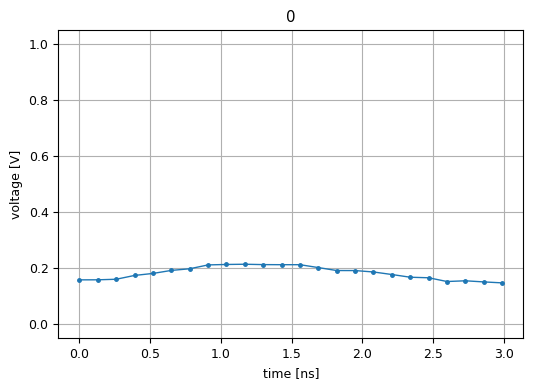

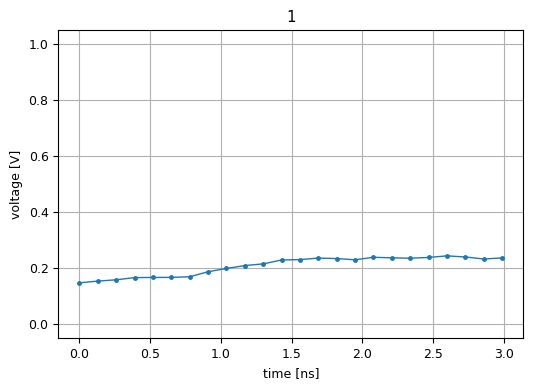

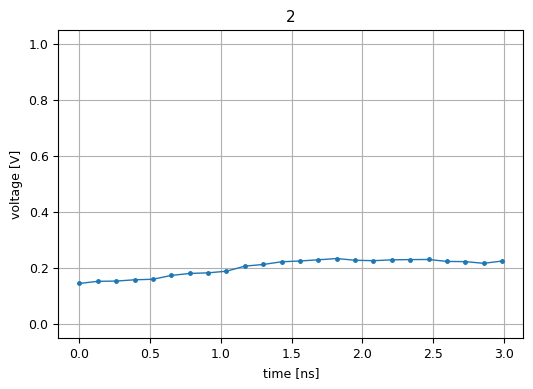

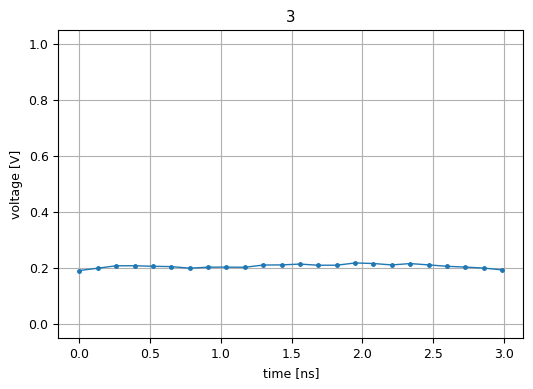

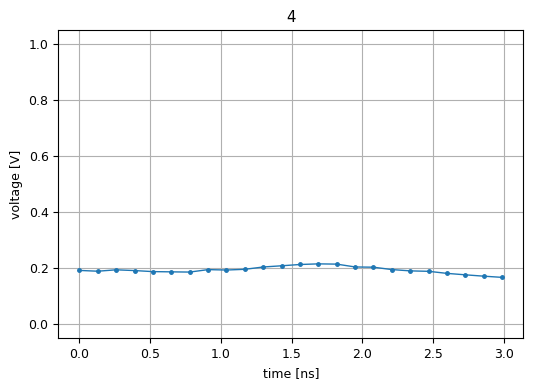

In [6]:
for i, waveform in enumerate(waveforms):
    show_waveform(waveform)
    plt.title(i)
    plt.show()

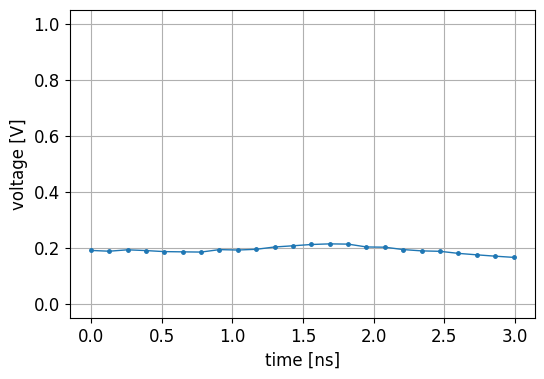

In [7]:
waveform = waveforms[4]

show_waveform(waveform, font_size=12)
save_plt(plt, IMAGES_DIR + 'noise_event.pdf')
plt.show()

# Saturated

In [8]:
waveforms = []
for event, event_data in dataset.items():
    if PLANE in event_data.planes and CHANNEL in event_data.planes[PLANE]:
        wav_data = event_data.planes[PLANE][CHANNEL]
        waveform = wav_data.series[1]
        if np.max(waveform) > max_threshold:
            waveforms.append(waveform)
        if len(waveforms) == 5:
            break

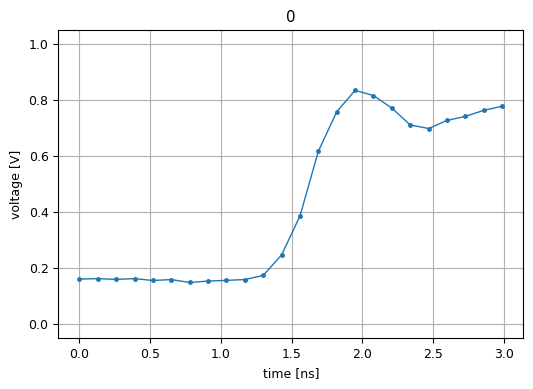

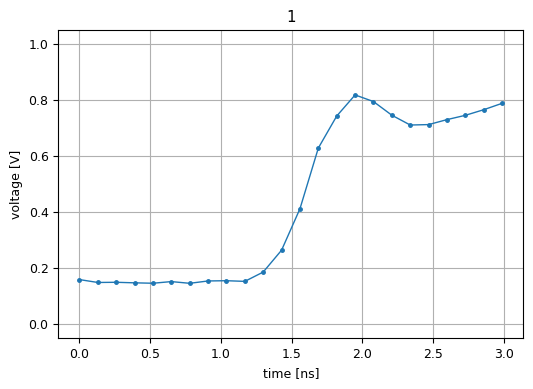

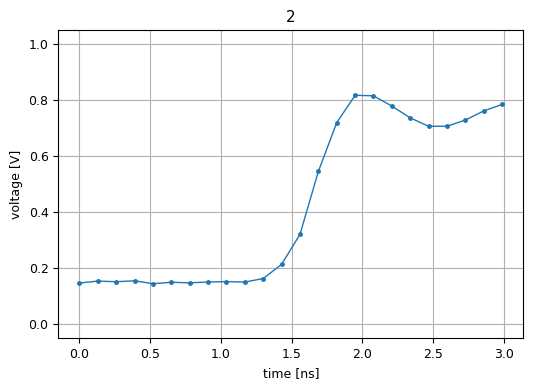

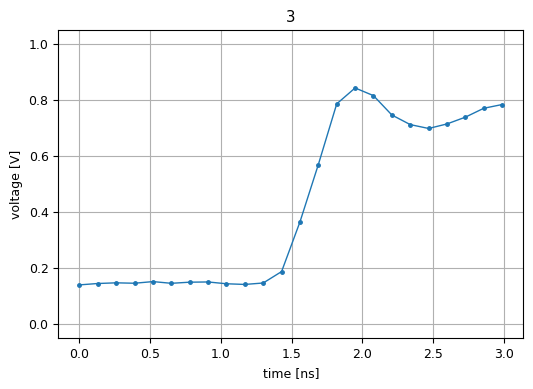

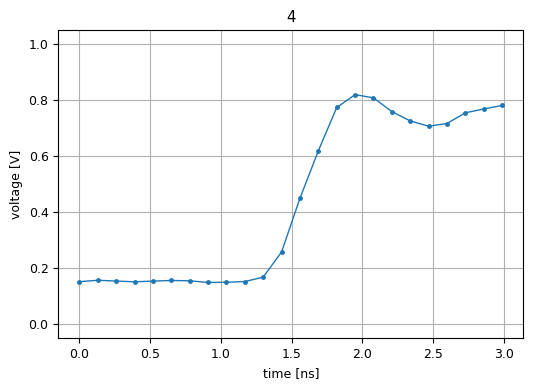

In [9]:
for i, waveform in enumerate(waveforms):
    show_waveform(waveform)
    plt.title(i)
    plt.show()

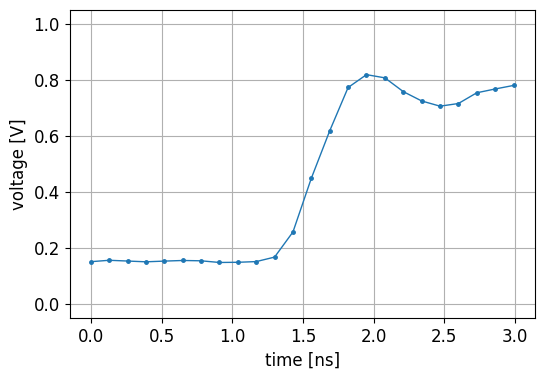

In [10]:
waveform = waveforms[4]

show_waveform(waveform, font_size=12)
save_plt(plt, IMAGES_DIR + 'saturated_event.pdf')
plt.show()